# Простые сетки

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

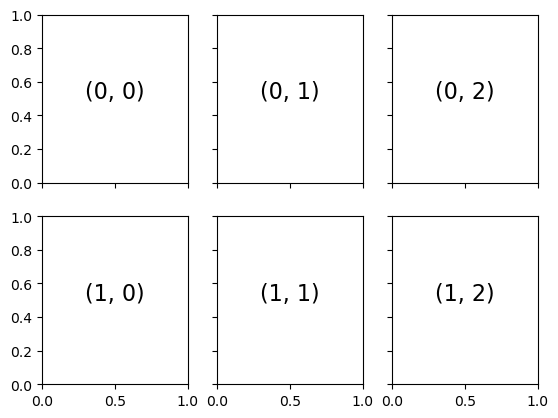

In [5]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=16, ha='center')

<Axes: >

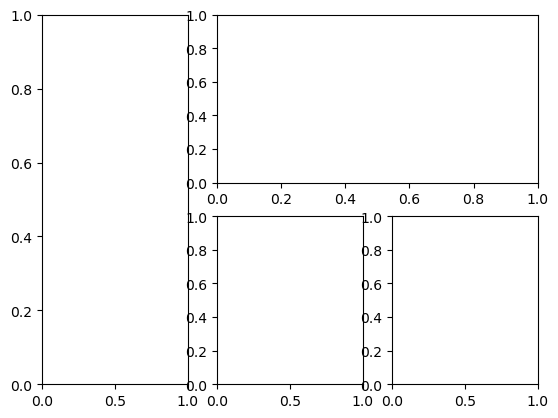

In [7]:
grid = plt.GridSpec(2, 3)
plt.subplot(grid[:2, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, 1])
plt.subplot(grid[1, 2])

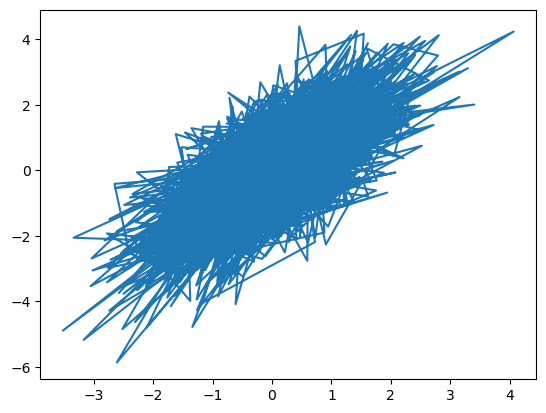

In [9]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]

rng = np.random.default_rng(1)
x, y = rng.multivariate_normal(mean, cov, 3000).T

plt.plot(x, y)

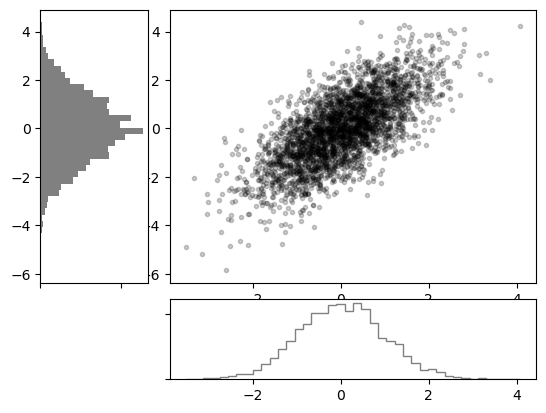

In [11]:
fig = plt.figure()
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

y_hist.hist(y, 40, orientation='horizontal', color='gray')
x_hist.hist(x, 40, orientation='vertical', color='gray', histtype='step')

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

In [15]:
births = pd.read_csv('births-1969.csv')
births

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
725,1969,12,29,M,5616
726,1969,12,30,F,5988
727,1969,12,30,M,6244
728,1969,12,31,F,5602


In [17]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births.head()

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


In [19]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1    4243
  2    4501
  3    4771
  4    4480
  5    4195

In [21]:
births_by_date.index = [datetime(1969, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
1969-01-01,4243
1969-01-02,4501
1969-01-03,4771
1969-01-04,4480
1969-01-05,4195


<Axes: title={'center': 'Рождаемость в 1969'}, ylabel='Число рождений'>

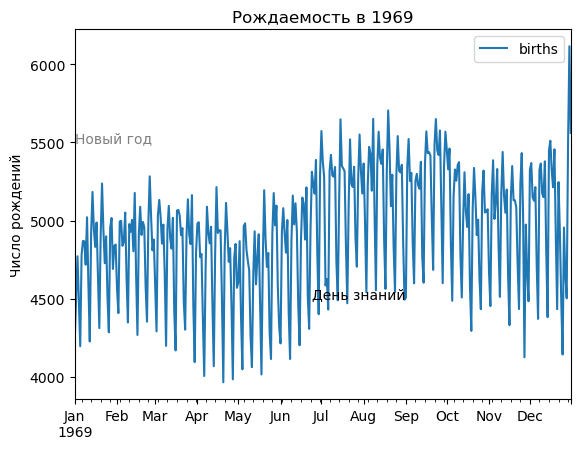

In [23]:
fig, ax = plt.subplots()

style = dict(size=10, color='gray')
ax.text('1969-01-01', 5500, 'Новый год', **style)
ax.text('1969-09-01', 4500, 'День знаний', ha='right')
ax.set(title='Рождаемость в 1969', ylabel='Число рождений')

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('&h'))
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))

births_by_date.plot(ax=ax)

Text(0.2, 0.2, 'Data6 (0.2, 0.2)')

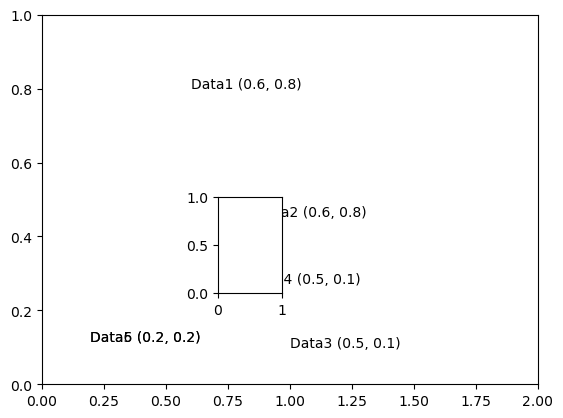

In [25]:
fig = plt.figure()
ax1 = plt.axes()
ax2 = plt.axes([0.4, 0.3, 0.1, 0.2])

ax1.set_xlim(0, 2)
ax1.text(0.6, 0.8, 'Data1 (0.6, 0.8)', transform=ax1.transData)
ax1.text(0.6, 0.8, 'Data2 (0.6, 0.8)', transform=ax2.transData)
ax1.text(0.5, 0.1, 'Data3 (0.5, 0.1)', transform=ax1.transAxes)
ax1.text(0.5, 0.1, 'Data4 (0.5, 0.1)', transform=ax2.transAxes)
ax1.text(0.2, 0.2, 'Data5 (0.2, 0.2)', transform=fig.transFigure)
ax1.text(0.2, 0.2, 'Data6 (0.2, 0.2)', transform=fig.transFigure)

Text(2, -6, 'Локальный минимум')

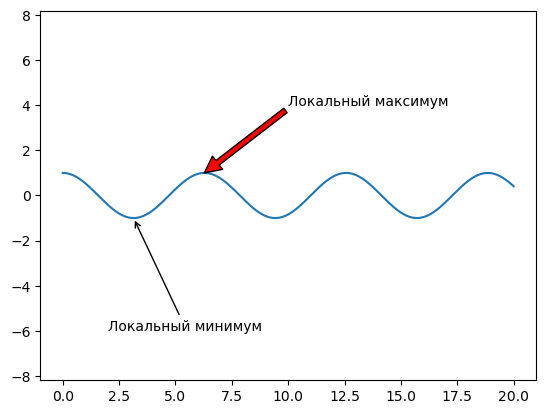

In [27]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('Локальный максимум', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='red'))
ax.annotate('Локальный минимум', xy=(3.14,- 1), xytext=(2, -6), arrowprops=dict(facecolor='blue', arrowstyle='->'))


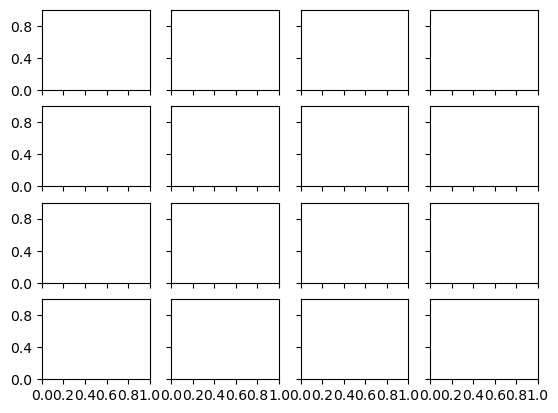

In [29]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

(array([  6.,  25.,  52., 150., 256., 262., 165.,  61.,  17.,   6.]),
 array([-3.2466358 , -2.59583454, -1.94503329, -1.29423203, -0.64343078,
         0.00737047,  0.65817173,  1.30897298,  1.95977424,  2.61057549,
         3.26137674]),
 <BarContainer object of 10 artists>)

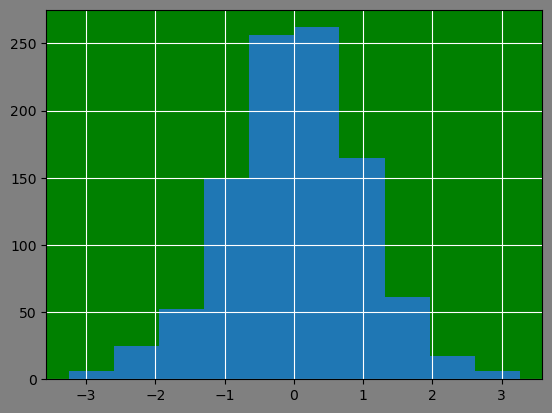

In [31]:
x = np.random.randn(1000)

fig = plt.figure(facecolor='gray')
ax = plt.axes(facecolor='green')
plt.grid(color='w', linestyle='solid')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
plt.hist(x)